In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Import some files

bin0_zmc = np.loadtxt('./txtfiles/DESY1_quantities_fromSara/bin0_zmc')
bin1_zmc = np.loadtxt('./txtfiles/DESY1_quantities_fromSara/bin1_zmc')
bin0_zmc_edges = np.loadtxt('./txtfiles/DESY1_quantities_fromSara/bin0_zmc_binEdges')
bin1_zmc_edges = np.loadtxt('./txtfiles/DESY1_quantities_fromSara/bin1_zmc_binEdges')
bin0_weighted = np.loadtxt('./txtfiles/DESY1_quantities_fromSara/bin0_zmc_weighted')
bin1_weighted = np.loadtxt('./txtfiles/DESY1_quantities_fromSara/bin1_zmc_weighted') 

bin0_zmean = np.loadtxt('./txtfiles/DESY1_quantities_fromSara/bin0_zmean')[1:]
bin1_zmean = np.loadtxt('./txtfiles/DESY1_quantities_fromSara/bin1_zmean')[1:]
bin0_zmean_edges = np.loadtxt('./txtfiles/DESY1_quantities_fromSara/bin0_zmean_binEdges')[1:]
bin1_zmean_edges = np.loadtxt('./txtfiles/DESY1_quantities_fromSara/bin1_zmean_binEdges')[1:]                         

DESY1_zmc = np.loadtxt('./txtfiles/DESY1_quantities_fromSara/DESY1_zmc')
DESY1_zmean = np.loadtxt('./txtfiles/DESY1_quantities_fromSara/DESY1_zmean')
DESY1_zmc_edges = np.loadtxt('./txtfiles/DESY1_quantities_fromSara/DESY1_zmc_binEdges')
DESY1_zmean_edges = np.loadtxt('./txtfiles/DESY1_quantities_fromSara/DESY1_zmean_binEdges')

lenz = np.loadtxt('./txtfiles/DESY1_quantities_fromSara/lens_z')[1:]
lenz_edges = np.loadtxt('./txtfiles/DESY1_quantities_fromSara/lens_binEdges')[1:]
redmagicz = np.loadtxt('./txtfiles/DESY1_quantities_fromSara/redMaGiC_z')[1:]
redmagicz_edges = np.loadtxt('./txtfiles/DESY1_quantities_fromSara/redMaGiC_binEdges')[1:]

In [ ]:
# Import some bigger files

#bin0_pzError=np.loadtxt('./txtfiles/DESY1_quantities_fromSara/bin0_photo-zError')
#bin1_pzError=np.loadtxt('./txtfiles/DESY1_quantities_fromSara/bin1_photo-zError')
#DESY1_pzError=np.loadtxt('./txtfiles/DESY1_quantities_fromSara/DESY1_photo-zError')

In [3]:
# From the bin edges, get bin centres
def bins_mid(bin_edges):
    """ Gets the middle of each linearly-spaced bin."""

    bin_centers=np.zeros(len(bin_edges)-1)
    for i in range(0,len(bin_edges)-1):
        bin_centers[i]    =       (bin_edges[i+1] - bin_edges[i])/2. + bin_edges[i]

    return bin_centers

In [4]:
# Re-bin the lenses in a smaller number of bins.
lens_subbin = np.zeros((100))
for i in range(100):
    #print("edge 1=",10*i)
    #print("edge 2=", 10*(i+1))
    lens_subbin[i] = sum(lenz[10*i:10*(i+1)])

lens_subbin_edges = np.zeros((101))
for i in range(100):
    lens_subbin_edges[i] = lenz_edges[10*i]
    #print("edges=", lens_subbin_edges[i])
lens_subbin_edges[-1] = lenz_edges[-1]

In [ ]:
len(lens_subbin_edges)

In [ ]:
len(lens_subbin)

In [5]:
bin0_zmc_cent = bins_mid(bin0_zmc_edges)
bin1_zmc_cent = bins_mid(bin1_zmc_edges)
bin0_zmean_cent = bins_mid(bin0_zmean_edges)
bin1_zmean_cent = bins_mid(bin1_zmean_edges)
DESY1_zmc_cent = bins_mid(DESY1_zmc_edges)
DESY1_zmean_cent = bins_mid(DESY1_zmean_edges)
lenz_cent = bins_mid(lenz_edges)
redmagicz_cent = bins_mid(redmagicz_edges)
lenz_subbin_cent = bins_mid(lens_subbin_edges)

In [ ]:
len(lenz_subbin_cent[0:99])

In [ ]:
np.savetxt('./txtfiles/DESY1_quantities_fromSara/bin0_zmc_centres.dat', bin0_zmc_cent)
np.savetxt('./txtfiles/DESY1_quantities_fromSara/bin1_zmc_centres.dat', bin1_zmc_cent)

np.savetxt('./txtfiles/DESY1_quantities_fromSara/bin0_zmean_centres.dat', bin0_zmean_cent)
np.savetxt('./txtfiles/DESY1_quantities_fromSara/bin1_zmean_centres.dat', bin1_zmean_cent)

np.savetxt('./txtfiles/DESY1_quantities_fromSara/DESY1_zmc_cent.dat', DESY1_zmc_cent)
np.savetxt('./txtfiles/DESY1_quantities_fromSara/DESY1_zmean_cent.dat', DESY1_zmean_cent)

np.savetxt('./txtfiles/DESY1_quantities_fromSara/lenz_cent.dat', lenz_cent)
np.savetxt('./txtfiles/DESY1_quantities_fromSara/lenz_subbin_cent.dat', lenz_subbin_cent[0:99])
np.savetxt('./txtfiles/DESY1_quantities_fromSara/redmagicz_cent.dat', redmagicz_cent)

In [ ]:
# Save the lens bin centres stacked with dNdz for lenses for convenience.
save_lenses = np.column_stack((lenz_cent, lenz))
np.savetxt('./txtfiles/DESY1_quantities_fromSara/z_dNdz_lenses.dat', save_lenses)

save_lenses_subbin = np.column_stack((lenz_subbin_cent[0:99], lens_subbin[0:99]))
np.savetxt('./txtfiles/DESY1_quantities_fromSara/z_dNdz_lenses_subbin.dat', save_lenses_subbin)

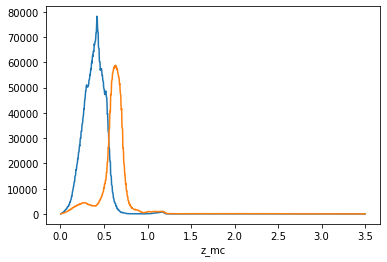

In [8]:
plt.figure()
plt.plot(bin0_zmc_cent,bin0_zmc)
plt.plot(bin1_zmc_cent,bin1_zmc)
plt.xlabel('z_mc')
#plt.savefig('./txtfiles/DESY1_quantities_fromSara/zmc_dists.png')
plt.show()

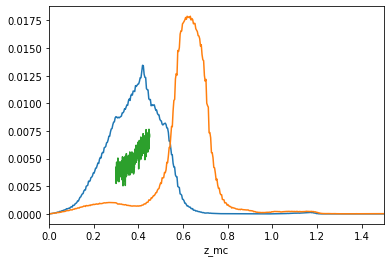

In [16]:
plt.figure()
plt.plot(bin0_zmc_cent,bin0_weighted/ sum(bin0_weighted))
plt.plot(bin1_zmc_cent,bin1_weighted / sum(bin1_weighted))
plt.plot(lenz_cent,lenz / sum(lenz)*5)
plt.xlabel('z_mc')
plt.xlim(0,1.5)
#plt.savefig('./txtfiles/DESY1_quantities_fromSara/zmc_dists.png')
plt.show()

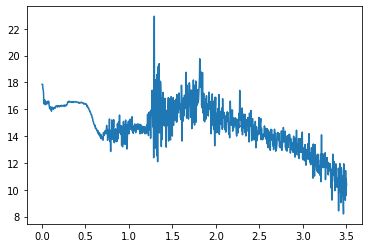

In [9]:
plt.figure()
plt.plot(bin0_zmc_cent, bin0_weighted/bin0_zmc)
plt.show()

In [ ]:
plt.figure()
plt.plot(bin0_zmean_cent, bin0_zmean)
plt.plot(bin1_zmean_cent,bin1_zmean)
plt.xlabel('z')
plt.savefig('./txtfiles/DESY1_quantities_fromSara/zmean_dists.png')
plt.show()

In [ ]:
plt.figure()
plt.plot(DESY1_zmc_cent, DESY1_zmc)
plt.show()

In [ ]:
plt.figure()
plt.plot(DESY1_zmean_cent, DESY1_zmean)
plt.show()

In [ ]:
plt.figure()
plt.plot(lenz_cent,lenz)
plt.show()

In [ ]:
plt.figure()
plt.plot(lenz_subbin_cent[0:99], lens_subbin[0:99])
plt.show()

In [ ]:
plt.figure()
plt.plot(redmagicz_cent,redmagicz)
plt.show()

In [ ]:
plt.figure()
plt.hist(bin0_pzError, bins=100)
plt.show()

In [ ]:
plt.figure()
plt.hist(bin1_pzError, bins=500)
plt.show()

In [ ]:
plt.figure()
plt.hist(DESY1_pzError, bins=100)
plt.show()